# Analyzing the difference in prices of listings

In [103]:
#importing the listing_details dataset
import pandas as pd
import numpy as np
from collections import Counter
df = pd.read_csv('./datasets/listings_detail.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
#filling the null values with zeros
df.fillna(0, inplace=True)

In [105]:
price = df['price']
prices=[]
#making price float value
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)
df['price']=prices

In [106]:
df = df[df.bathrooms >0]
df = df[df.bedrooms > 0]
df = df[df.beds > 0]
df = df[df.price  > 0]
df = df[df.review_scores_rating  > 0]
df = df[df.reviews_per_month > 0]
df = df[df.accommodates  > 0]
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,20702398,https://www.airbnb.com/rooms/20702398,20171002002103,2017-10-03,Quiet house on City Island,1 private bedroom and bathroom available for o...,0,1 private bedroom and bathroom available for o...,none,This neighborhood is dope! Lot's of seafood re...,...,f,0.0,0,f,f,moderate,f,f,1,2.00
2,6627449,https://www.airbnb.com/rooms/6627449,20171002002103,2017-10-03,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,f,0.0,0,f,f,strict,f,f,1,0.77
5,5557381,https://www.airbnb.com/rooms/5557381,20171002002103,2017-10-03,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,f,0.0,0,t,f,moderate,f,f,1,3.27
6,19609887,https://www.airbnb.com/rooms/19609887,20171002002103,2017-10-02,Sweet Getaway,"Getaway for two (2) or up to seven (7), nice s...","$150 first two guests per night, $25 each add...","Getaway for two (2) or up to seven (7), nice s...",none,"If you enjoy seafood, City Island is the place...",...,f,0.0,0,f,f,flexible,f,f,1,1.58
7,7949480,https://www.airbnb.com/rooms/7949480,20171002002103,2017-10-03,City Island Sanctuary BR & Private Bath w Parking,Relax on City Island in our quiet guest room w...,"On parle français et anglais, (lire le françai...",Relax on City Island in our quiet guest room w...,none,City Island is a unique sanctuary in New York ...,...,f,0.0,0,f,f,moderate,t,t,1,1.49


In [107]:
# grouping listings based on room_type
temp_df=df.groupby('room_type').id.count()
temp_df=temp_df.reset_index()
temp_df=temp_df.rename(columns={'id':'count'})
temp_df

,room_type,count
0,Entire home/apt,14665
1,Private room,15313
2,Shared room,810


Counter({'Private room': 15313, 'Entire home/apt': 14665, 'Shared room': 810})


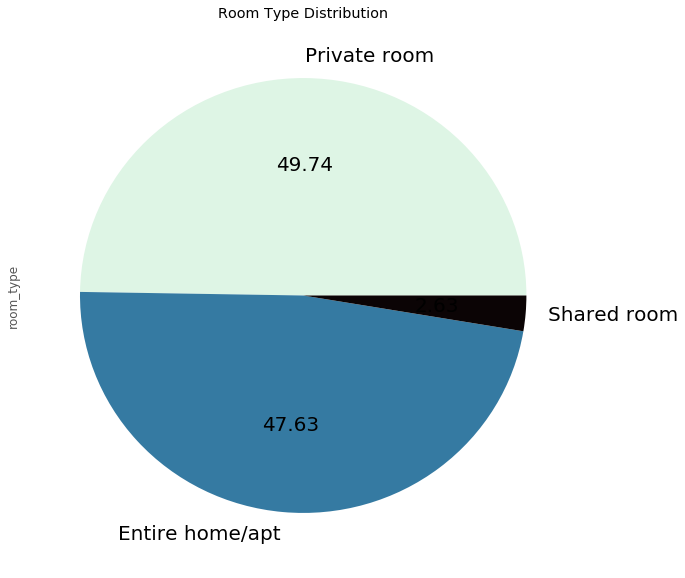

In [108]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = df.room_type
r = Counter(room)
print(r)
temp_df = pd.DataFrame.from_dict(r, orient='index')
temp_df.columns = ['room_type']
temp_df.plot.pie(y = 'room_type', 
                 figsize=(10,10), 
                 colormap = 'mako_r',
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')


Text(0,0.5,'Number of listings')

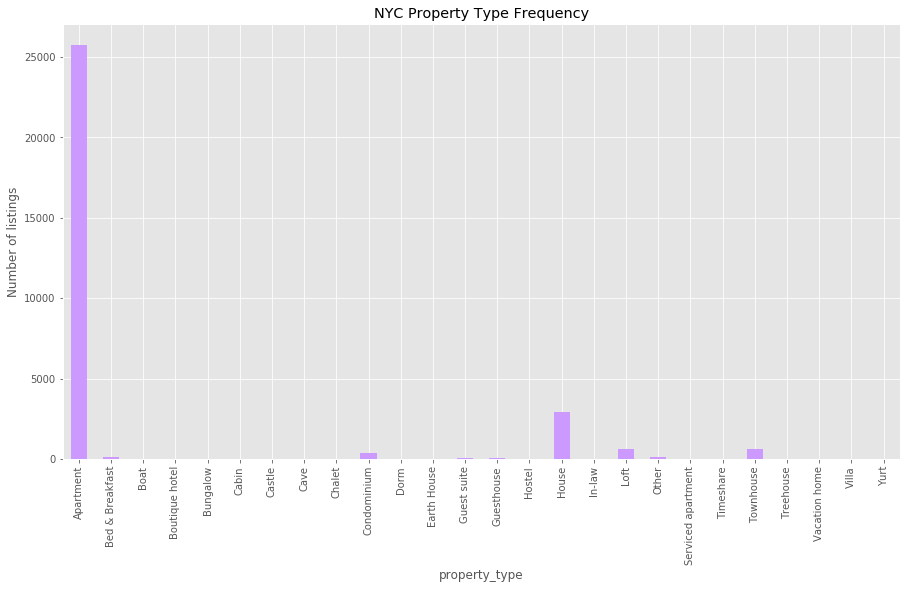

In [109]:
# Plotting the number of listings based on their property type

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

temp_property_df = df.groupby('property_type').id.count()
temp_property_df= temp_property_df.reset_index()
temp_property_df=temp_property_df.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#cc99ff', 
           figsize =(15,8), 
           title = 'NYC Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

In [110]:
#Prices for different room type and property type

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
48,Timeshare,Entire home/apt,450.363636
40,Loft,Entire home/apt,312.454545
19,Condominium,Entire home/apt,308.927966
50,Townhouse,Entire home/apt,308.305921
32,Hostel,Entire home/apt,280.000000


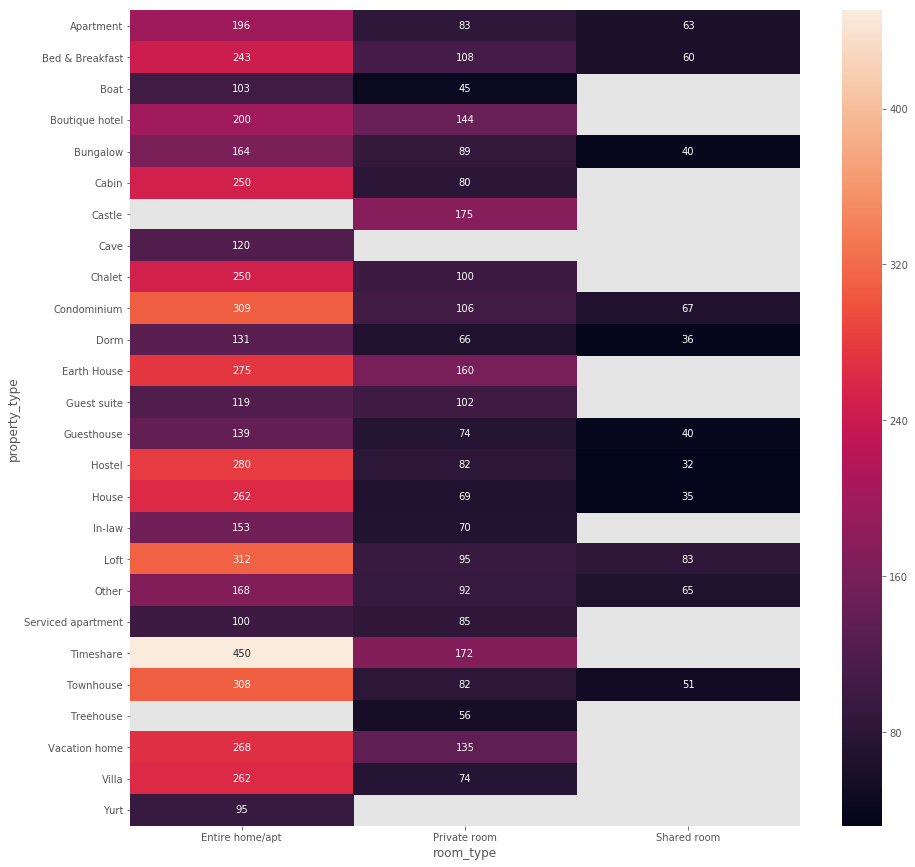

In [111]:
#Plotting the same on a heatMap
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

From the above heatmap, it can be observed that for any property type, prices are maximum for Entire home/apartment. Hence property type and room type are one of the most important factors in deciding price of a listing.

# Where to invest in property in NYC?

In [112]:
# Average prices for each type of listing

avg_Price=df.groupby('room_type').price.mean()
avg_Price=avg_Price.reset_index()
avg_Price=avg_Price.rename(columns={'price':'average_Price'})
avg_Price

,room_type,average_Price
0,Entire home/apt,207.340880
1,Private room,82.099784
2,Shared room,59.969136


In [113]:
type_home = df[(df.room_type == 'Entire home/apt')]
type_private = df[(df.room_type == 'Private room')]
type_shared = df[(df.room_type == 'Shared room')]

In [114]:
# number of listings grouped with neighbourhood

neighbourhood = type_home.groupby('neighbourhood_cleansed').id.count()
neighbourhood=neighbourhood.reset_index()
neighbourhood=neighbourhood.rename(columns={'id':'Number_Of_Listings'})
neighbourhood=neighbourhood.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood.head()

,neighbourhood_cleansed,Number_Of_Listings
189,Williamsburg,1271
11,Bedford-Stuyvesant,1010
57,East Village,807
85,Harlem,714
180,Upper West Side,697


In [115]:
# average price of listings grouped with neighbourhood

neighbourhood_avg_price = type_home.groupby('neighbourhood_cleansed').price.mean()
neighbourhood_avg_price = neighbourhood_avg_price.reset_index()
neighbourhood_avg_price = neighbourhood_avg_price.rename(columns={'price':'Average_Price'})
neighbourhood_avg_price = neighbourhood_avg_price.sort_values('Average_Price',ascending=[0])
neighbourhood_avg_price.head()


mergeDF=pd.merge(neighbourhood,neighbourhood_avg_price,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Average_Price
0,Williamsburg,1271,200.220299
1,Bedford-Stuyvesant,1010,154.599010
2,East Village,807,232.619579
3,Harlem,714,173.060224
4,Upper West Side,697,255.769010


Text(0,0.5,'Number Of Listings')

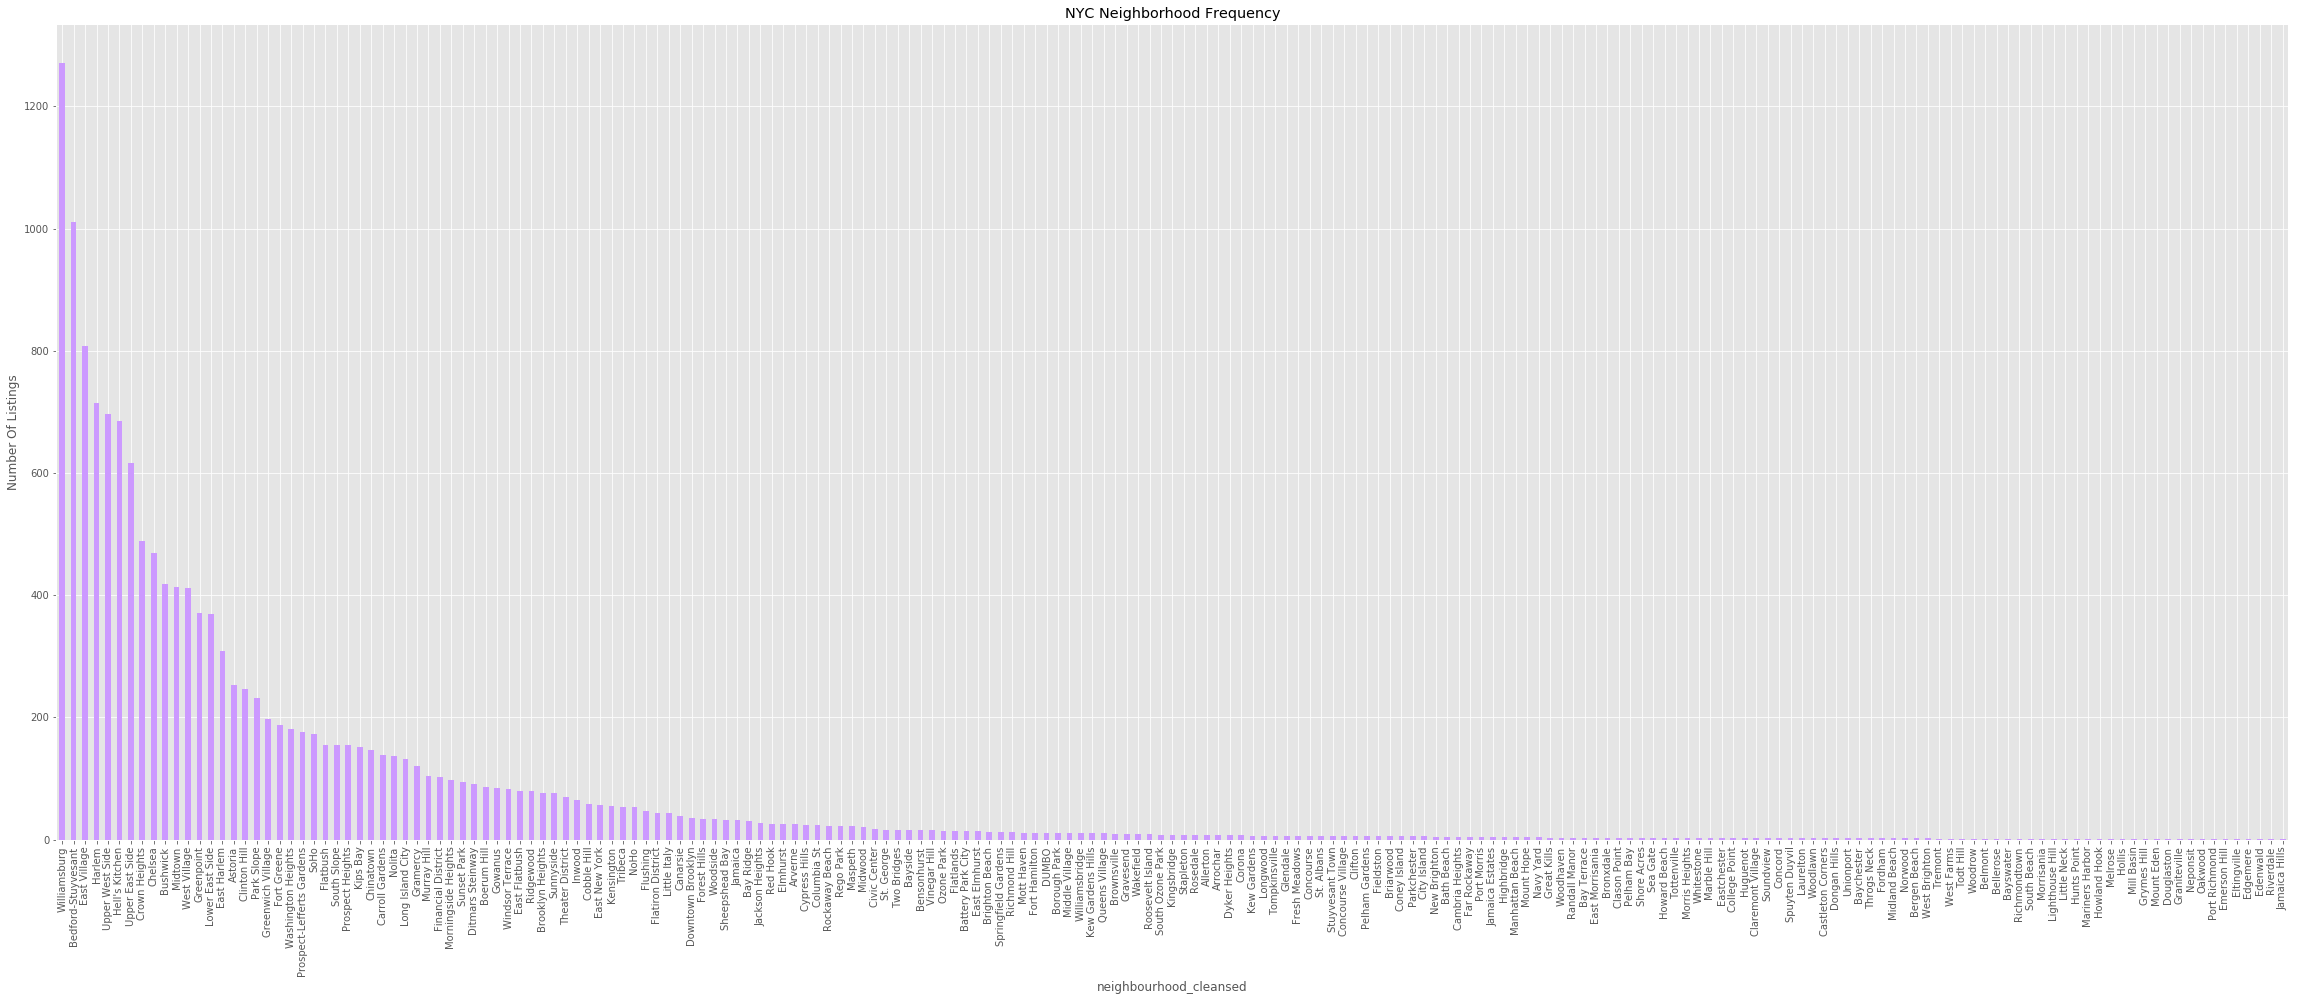

In [116]:
# Frequency of listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhood['neighbourhood_cleansed']
y_pos = neighbourhood['Number_Of_Listings']

neighbourhood.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#cc99ff', 
           figsize =(40,15), 
           title = 'NYC Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number Of Listings')

Text(0,0.5,'Average Price')

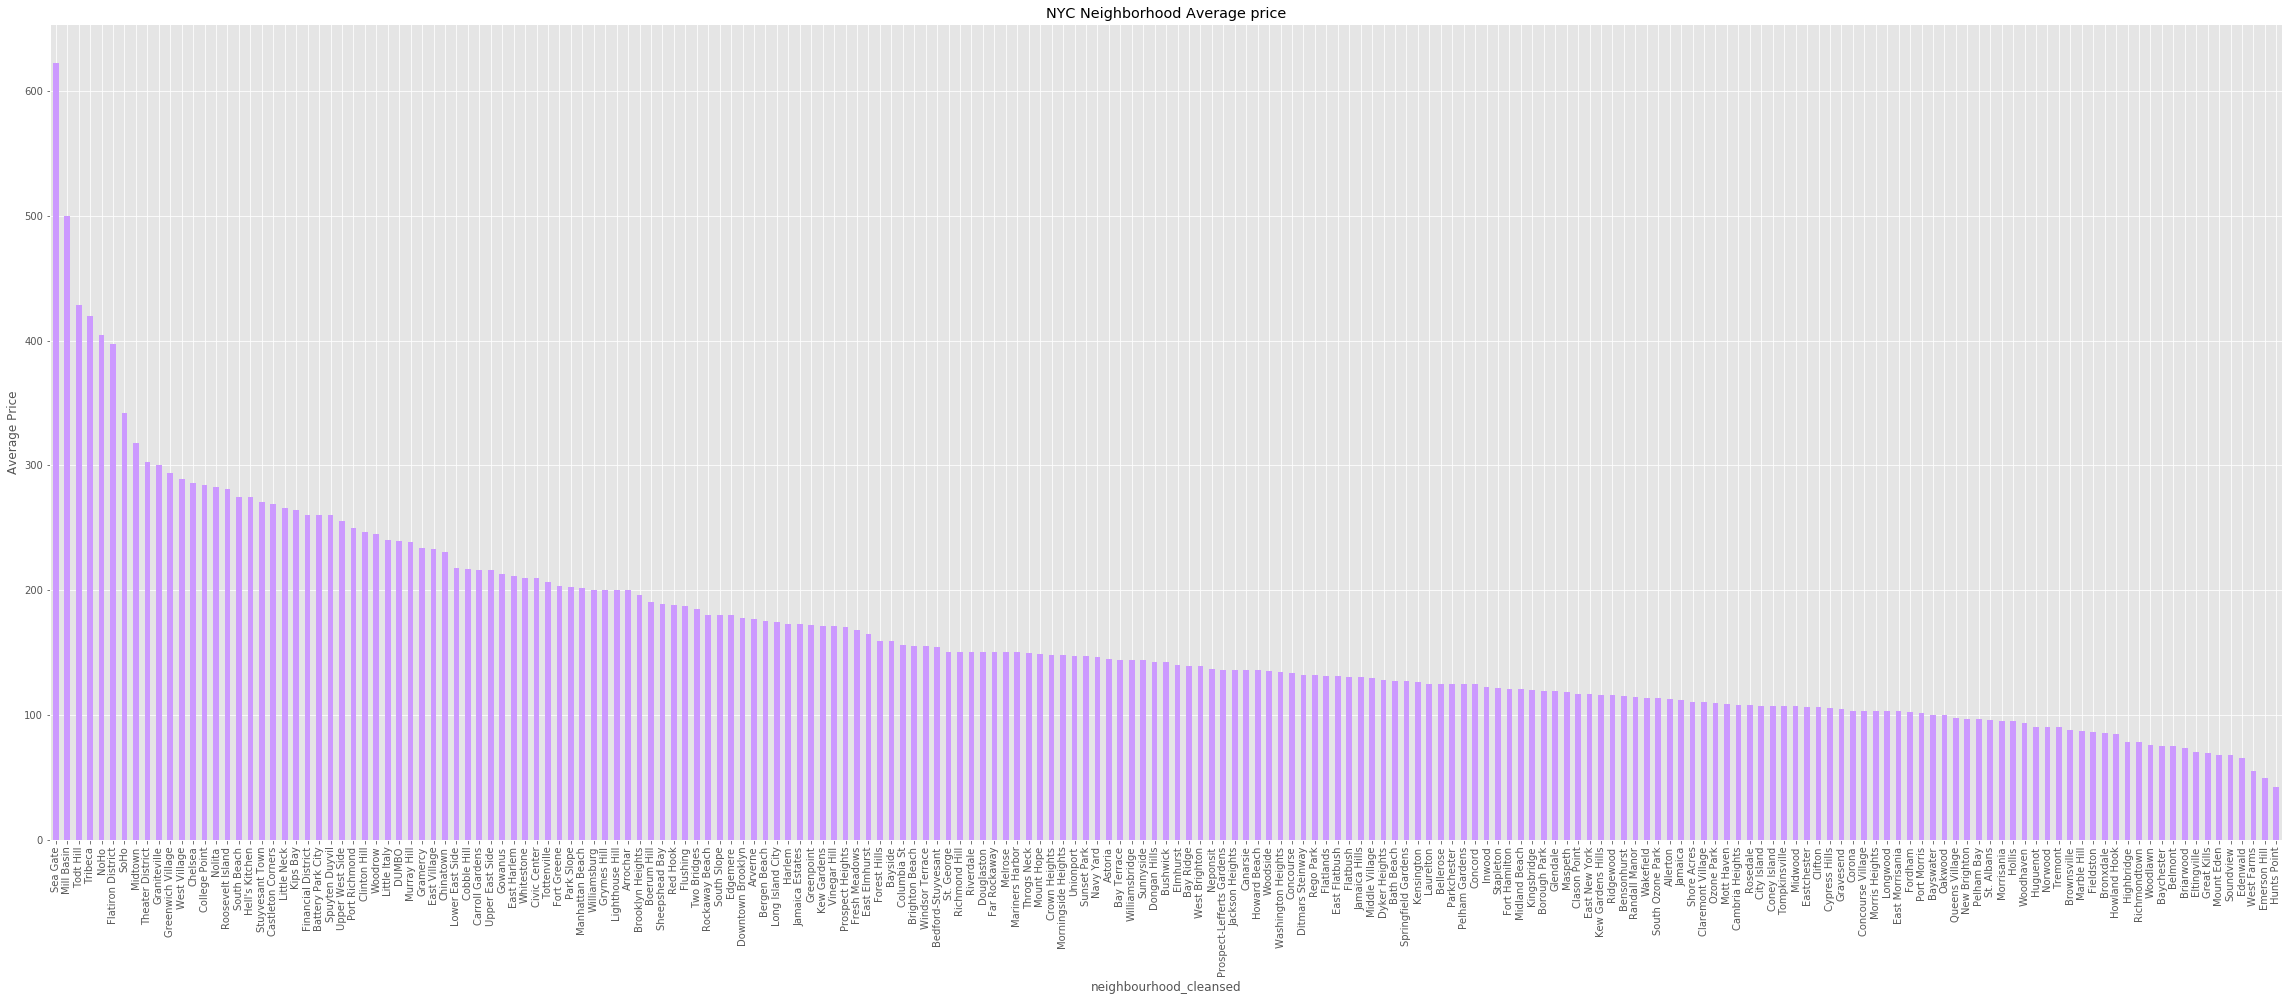

In [117]:
# Avg price of listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhood_avg_price['neighbourhood_cleansed']
y_pos = neighbourhood_avg_price['Average_Price']

neighbourhood_avg_price.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Average_Price',
           color = '#cc99ff', 
           figsize =(40,15), 
           title = 'NYC Neighborhood Average price', 
           legend = False)

plt.ylabel('Average Price')